# CMSC478 Machine Learning - Fall 2020

## Instructor: Fereydoon Vafaei

## <font color="blue">Assignment-5: Image Classification with Convolutional Neural Networks</font>

Bryan Delas Penas GW90572

## Overview and Learning Objectives

In Assignment-5, you're going to perform image classification using Convolutional Neural Networks in Tensorflow and Keras.

Pedagogically, this assignment will help you:
- better understand how CNNs are built and applied on ML/CV tasks specifically for image classification.
- practice CNN implementation using Tensorflow 2 and Keras.

**Very Important Note:** Assignment-5 has NO late period, i.e. late submissions will NOT be accepted. Read the instructions and grading rubric carefully. Building and training CNNs are time-consuming tasks. **You're strongly recommended to get started on A5 EARLY!**

## Part I - CIFAR-10 Baseline Model

You're going to build a CNN image classifier for [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. Since it's one of the built-in datasets in keras, it will be downloaded and loaded automatically using the following provided code.

In [1]:
# Import necessary Python modules as well as Tensorflow and Keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings("ignore")

In [2]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.1.0
Eager Execution mode:  True


> Load CIFAR-10 data.

In [3]:
# Load the data 
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### Preprocessing

In [4]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

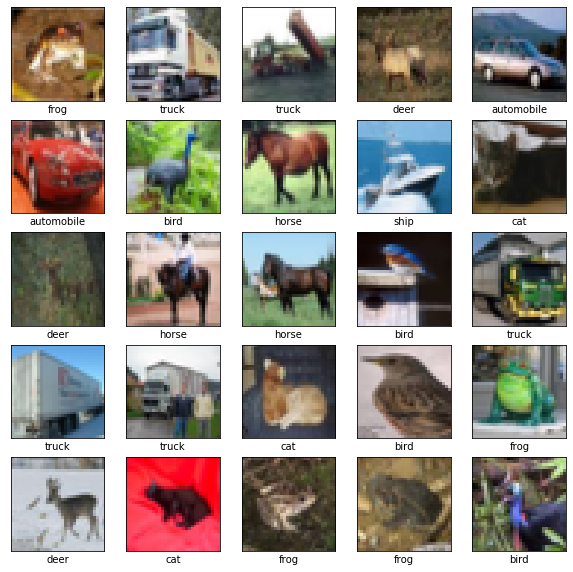

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])

### Building the Baseline CNN for Image Classification of CIFAR-10

The following provided model is a simple CNN based on [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/images/cnn) using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers. Baseline model can achieve 0.70 accuracy on CIFAR-10 test images. The input shape of CIFAR-10 images is (32, 32, 3).

In [6]:
# Baseline model based on: https://www.tensorflow.org/tutorials/images/cnn
baseline_model = models.Sequential()
baseline_model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))
# number of filters usually grows
baseline_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
baseline_model.add(layers.MaxPooling2D((2, 2)))
baseline_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(64, activation='relu')) # FC Layer
baseline_model.add(layers.Dense(10, activation='softmax')) # Output layer for 10-class classification

> Notice how the output shape changes after each layer in the baseline model summary.

In [7]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [8]:
optimizer = tf.keras.optimizers.Adam(lr=0.001) 

baseline_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

> Train the baseline model with 10 epochs only and then plot the train history.

In [9]:
history_baseline = baseline_model.fit(X_train, y_train, epochs=10,
                                      validation_data=(X_test, y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 21s 429us/sample - loss: 1.4714 - accuracy: 0.4632 - val_loss: 1.2167 - val_accuracy: 0.5665
Epoch 2/10
50000/50000 [==============================] - 21s 413us/sample - loss: 1.0888 - accuracy: 0.6151 - val_loss: 1.0170 - val_accuracy: 0.6378
Epoch 3/10
50000/50000 [==============================] - 20s 409us/sample - loss: 0.9315 - accuracy: 0.6716 - val_loss: 0.9497 - val_accuracy: 0.6575
Epoch 4/10
50000/50000 [==============================] - 21s 410us/sample - loss: 0.8363 - accuracy: 0.7044 - val_loss: 0.8553 - val_accuracy: 0.7012
Epoch 5/10
50000/50000 [==============================] - 21s 413us/sample - loss: 0.7656 - accuracy: 0.7317 - val_loss: 0.8721 - val_accuracy: 0.6951
Epoch 6/10
50000/50000 [==============================] - 20s 397us/sample - loss: 0.7060 - accuracy: 0.7509 - val_loss: 0.8863 - val_accuracy: 0.6914
Epoch 7/10
50000/50000 [====================

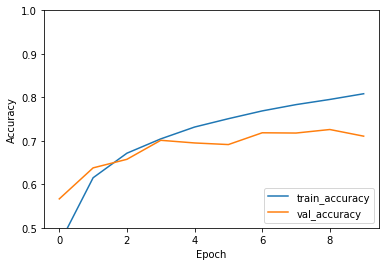

In [10]:
plt.plot(history_baseline.history['accuracy'], label='train_accuracy')
plt.plot(history_baseline.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

> The training plot clearly shows a gap between the train accuracy and validation accuracy, an indication of **overfitting**.

> Now, evaluate the baseline model on test images.

In [11]:
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test,  y_test, verbose=1)

10000/10000 [==============================] - 2s 163us/sample - loss: 0.8752 - accuracy: 0.7107


In [12]:
baseline_test_acc

0.7107

## Part II - CIFAR-10 Classification Using CNN

In Part II, you're going to improve the baseline CNN.

- **Note:** Transfer Learning and using a loaded model is NOT accepted. You must build and train your model from scratch, generate all the outputs including the fit method outputs, and history plots; otherwise, NO credit! Only FULL training sessions are accepted.


- Use "Save and Checkpoint" at the top menu of the Jupyter Notebook to save your outputs and plots before submission.


- The minimum required accuracy on test images of CIFAR-10 is 0.75 to get a score of 75/100. Anything below 0.75 will get ZERO for A5. See "Grading" for further information on how A5 is graded.

### Building CNN for Improving The Baseline Model Using Regularization and Other Techniques

Some techniques that might be helpful to improve the baseline model is listed below, but you can try any other technique that you think might be helpful to improve your model.

- Regularization using [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

- Initialization Methods such as He 

- [Batch Normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)

- Data Augmentation using [Tensorflow ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) or other techniques and implementations of your choice

- Learning Rate Scheduling

You may also search for solutions online and borrow them with proper citation. See "References" for further information on how to properly cite any resource you may use.

You certainly need to fine-tune your model, but some helpful strategies to start with are as follows:


- You may need to add more Conv2D and MaxPooling2D layers, but don't add too many layers initially, increase your model complexity gradually. 


- Start with short training sessions with 20-50 epochs until you see some progress. Once you hit 0.75 accuracy and secured your 75/100 score, you may run for longer training sessions. To get 0.80+, you may run training for at least 100 epochs or use callback and early stopping to determine optimal number of epochs. For higher accuracies, you may need to run training up to ~400-500 epochs with no intervention, but keep in mind that it may take a long time, so it would be rational to first aim for the minimum accuracy of 0.75 with fewer number of epochs. **Notice that if you don't get at least 0.75 accuracy, your A5 grade will be ZERO!** Check "Grading" for further details.


- You may initially use a learning rate of 0.001 and Adam, RMSProp or SGD as the optimizer. You may want to tune the learning rate and/or try learning rate scheduling methods.


- Check the progress in the training log of the baseline model and see how the accuracy improves. Similarly, you should watch the progress of your CNN during training, and if you don't see any progress in reducing loss and increasing accuracy, stop training and make any necessary changes. Don't wait for too long if you don't see any progress at all in the first epochs because that's a red flag that something is not right in your model, and you should fix any possible problem first. It's fine though if the improvements in each epoch are small, that's how CNNs learn!

## <font color="red"> Required Coding

In [6]:
# Import any additional tf/keras modules that you might need for your work
from keras.layers import Dropout
from keras.layers import SpatialDropout2D
from keras.layers import BatchNormalization
# Build a CNN using Conv2D and MaxPooling2D,
# as well as any other regularization technique such as Dropout,
# or any other technique you learned or are interested to try in training DNNs and CNNs
# TRANSFER LEARNING IS NOT ALLOWED!

# This is the example given in part 1
baseline_model_two = models.Sequential()
baseline_model_two.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                        input_shape=(32, 32, 3)))
# 1) We add batch normalization to stablize the learning in each pooling layer and maybe accelaerate the learning process
baseline_model_two.add(layers.BatchNormalization())
baseline_model_two.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same")) 
# 1) We add batch normalization to stablize the learning in each pooling layer and maybe accelaerate the learning process
baseline_model_two.add(layers.BatchNormalization())

baseline_model_two.add(layers.MaxPooling2D((2, 2)))
# Drop rate of 20% aka 80% nodes are retain 
baseline_model_two.add(layers.Dropout(0.2))

# 64 filters 
baseline_model_two.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same")) 
# 1) We add batch normalization to stablize the learning in each pooling layer and maybe accelaerate the learning process
baseline_model_two.add(layers.BatchNormalization())
baseline_model_two.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same")) 
# 1) We add batch normalization to stablize the learning in each pooling layer and maybe accelaerate the learning process
baseline_model_two.add(layers.BatchNormalization())

baseline_model_two.add(layers.MaxPooling2D((2, 2)))
# 1) Drop rate of 30% aka 70% nodes are retain 
baseline_model_two.add(layers.Dropout(0.3))

# 128 filters 
baseline_model_two.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same")) 
# 1) We add batch normalization to stablize the learning in each pooling layer and maybe accelaerate the learning process
baseline_model_two.add(layers.BatchNormalization())
baseline_model_two.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same")) 
# 1) We add batch normalization to stablize the learning in each pooling layer and maybe accelaerate the learning process
baseline_model_two.add(layers.BatchNormalization())

baseline_model_two.add(layers.MaxPooling2D((2, 2)))
# 1) Drop rate of 40% aka 60% nodes are retain 
baseline_model_two.add(layers.Dropout(0.4))
baseline_model_two.add(layers.Flatten())

# 1) We have 128 filters so we can have a dense layer of 128 FC Layer
baseline_model_two.add(layers.Dense(128, activation='relu'))
# 1) We add batch normalization to stablize the learning in each FC layer and maybe accelaerate the learning process
baseline_model_two.add(layers.BatchNormalization())
# 1) Drop rate of 50% aka 50% nodes are retain 
baseline_model_two.add(layers.Dropout(0.5))

# Output layer for 10-class classification
baseline_model_two.add(layers.Dense(10)) 
# 1) We add batch normalization to stablize the learning in each FC layer and maybe accelaerate the learning process
baseline_model_two.add(layers.BatchNormalization())
baseline_model_two.add(layers.Activation('softmax'))

# NOTE: You must document your code by understandable and easy-to-follow comments.

baseline_model_two.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [7]:
# Compile your model
optimizer_two = tf.keras.optimizers.Adam(lr=0.001) 

baseline_model_two.compile(optimizer=optimizer_two, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train your model
history_baseline_two = baseline_model_two.fit(X_train, y_train, epochs=400,
                                      validation_data=(X_test, y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/400
50000/50000 [==============================] - 111s 2ms/sample - loss: 1.4535 - accuracy: 0.4936 - val_loss: 1.0744 - val_accuracy: 0.6327
Epoch 2/400
50000/50000 [==============================] - 108s 2ms/sample - loss: 1.0527 - accuracy: 0.6425 - val_loss: 1.0619 - val_accuracy: 0.6308
Epoch 3/400
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.8972 - accuracy: 0.6988 - val_loss: 0.7145 - val_accuracy: 0.7571
Epoch 4/400
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.8019 - accuracy: 0.7319 - val_loss: 0.6194 - val_accuracy: 0.7922
Epoch 5/400
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.7393 - accuracy: 0.7503 - val_loss: 0.6071 - val_accuracy: 0.7945
Epoch 6/400
50000/50000 [==============================] - 108s 2ms/sample - loss: 0.6911 - accuracy: 0.7685 - val_loss: 0.5588 - val_accuracy: 0.8088
Epoch 7/400
50000/50000 [===================

Epoch 108/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1554 - accuracy: 0.9490 - val_loss: 0.4451 - val_accuracy: 0.8777
Epoch 109/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1561 - accuracy: 0.9475 - val_loss: 0.4518 - val_accuracy: 0.8774
Epoch 110/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1584 - accuracy: 0.9476 - val_loss: 0.4392 - val_accuracy: 0.8758
Epoch 111/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1570 - accuracy: 0.9478 - val_loss: 0.4508 - val_accuracy: 0.8751
Epoch 112/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1541 - accuracy: 0.9490 - val_loss: 0.4458 - val_accuracy: 0.8745
Epoch 113/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1538 - accuracy: 0.9503 - val_loss: 0.4374 - val_accuracy: 0.8787
Epoch 114/400
50000/50000 [==============================] - 106s 2ms/sample - los

50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1058 - accuracy: 0.9651 - val_loss: 0.4848 - val_accuracy: 0.8778
Epoch 215/400
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.1094 - accuracy: 0.9648 - val_loss: 0.4704 - val_accuracy: 0.8799
Epoch 216/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1097 - accuracy: 0.9644 - val_loss: 0.4819 - val_accuracy: 0.8777
Epoch 217/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.1071 - accuracy: 0.9654 - val_loss: 0.4651 - val_accuracy: 0.8793
Epoch 218/400
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.1094 - accuracy: 0.9646 - val_loss: 0.4722 - val_accuracy: 0.8777
Epoch 219/400
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.1083 - accuracy: 0.9645 - val_loss: 0.4838 - val_accuracy: 0.8786
Epoch 220/400
50000/50000 [==============================] - 106s 2ms/sample - loss: 0.1083 - ac

50000/50000 [==============================] - 107s 2ms/sample - loss: 0.0907 - accuracy: 0.9706 - val_loss: 0.4729 - val_accuracy: 0.8855
Epoch 321/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.0884 - accuracy: 0.9703 - val_loss: 0.4898 - val_accuracy: 0.8815
Epoch 322/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.0864 - accuracy: 0.9715 - val_loss: 0.4791 - val_accuracy: 0.8841
Epoch 323/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.0924 - accuracy: 0.9702 - val_loss: 0.5159 - val_accuracy: 0.8738
Epoch 324/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.0940 - accuracy: 0.9695 - val_loss: 0.4948 - val_accuracy: 0.8788
Epoch 325/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.0893 - accuracy: 0.9705 - val_loss: 0.4689 - val_accuracy: 0.8860
Epoch 326/400
50000/50000 [==============================] - 107s 2ms/sample - loss: 0.0836 - ac

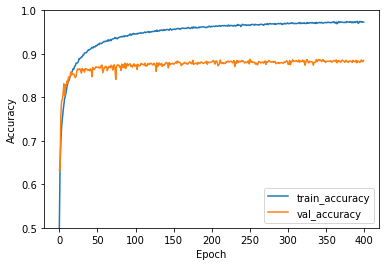

In [9]:
# Plot the train history
plt.plot(history_baseline_two.history['accuracy'], label='train_accuracy')
plt.plot(history_baseline_two.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [10]:
# Evaluate your model on X_test and y_test
baseline_two_test_loss, baseline_two_test_acc = baseline_model_two.evaluate(X_test,  y_test, verbose=1)

10000/10000 [==============================] - 8s 795us/sample - loss: 0.4736 - accuracy: 0.8847


In [11]:
round(baseline_two_test_acc, 2)

0.88

## Methods

Write a COMPLETE description of all the methods you have used in your CNN model here in at least one paragraph. Otherwise your notebook receives NO credit! No need to explain Conv2D or MaxPooling2D, those are the basis of CNN.<br>
<b>The only other two methods, not including Conv2D, Maxpooling2D or Dense was Dropout and Batch Learning. In my code, 
Dropout takes in one parameter, which should be a number between 0.1 - 1 which indicaites the amount of neurons ignored. Dropout is ignoring neurons durning the training phase of certain set of neurons, which are chosen at random. Batch Normalization is a technique for training very deep nerural networks that standardizes the input to a layer for each mini-batch. It can be applied ether the activations of a prior layer or the inputs directly.</b>

## Conclusions

Write a COMPLETE analysis and conclusion of your experiments and results here in at least one paragraph. Otherwise your notebook receives NO credit! <br>
<b> When I firsted started part two, I used part one as a reference. I started by just using dropout, this gave me a .75 result just by using dropout. After applying batch normalization after each layer, Increasing the number of pooling layers and filters , and increasing the dropout by .1, but starting at .2, after each pooling and output layer I reached .86 with 100 epochs. Then I ran my code with 400 epochs and got the result of .88. I just used a combination of dropout and batch normlization, if I had included data augmentation, my result would have most likely increased.  </b>

## References

Include all the references to codes, websites, articles, notebooks, GitHub repos, etc. that you've used to build your model here. No specific format for references is required, but at the minimum, you should have a separate numbered row for each reference, and include the URL if it has a web link.

If you borrow any code, you must document and comment each line of the code LINE BY LINE to explain exactly what it's doing. In the cell that contains the borrowed code, you should include (as comment) the reference number listed here.

**Warning**: If you borrow a code without proper citation here, it will be regarded and reported as plaigiarism, and the minimum consequence is ZERO in A5.
http://d2l.ai/chapter_convolutional-modern/batch-norm.html <br> 
1) https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/


## Grading

Assignment-5 has a maximum grade of 100. Grading is based on the evaluation of your model accuracy on test images of CIFAR-10 dataset. There is NO late period for A5, thus late submissions will NOT be graded and will get ZERO.

- The first 75 points is granted IF AND ONLY IF you get the **minimum required accuracy of 0.75 on test images** of CIFAR-10 dataset. Otherwise, if your CNN gets anything below 0.75, your submission will get ZERO credit!


- If you get an accuracy in the range [0.75, 0.80], your A5 grade will be exactly the same as your accuracy, e.g. you get an accuracy of 0.76, your grade for A5 will be 76/100, if you get 0.78, your grade will be 78/100, and so on.


- If you get an accuracy in the range [0.81, 0.87] your grade will be 90/100.


- If you get an accuracy of 0.88 or higher, your grade will be 100/100.

<b>Very Important Note: </b>
- Transfer Learning and using a loaded model is NOT accepted. You must build and train your model from scratch, generate all the outputs including the fit method outputs, and history plots. Use "Save and Checkpoint" at the top menu of the Jupyter Notebook to save the outputs.
- Additionally, you must include at least one paragraph for **Methods** and at least one paragraph for **Conclusions**. Otherwise, your submission will NOT be graded and gets ZERO credit!

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A5.ipynb```. Submit the completed notebook using the ```Assignment-5``` link on Blackboard.

Grading will be based on 

  * correct implementation and results,
  * getting minimum required accuracy on the test images of CIFAR-10, the final highest accuracy of your CNN on test images, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday December 7th, 11:59PM.</b></font>